# **Data Cleaning Main Datavista and Area Dataset**

This is the initial stage of developing a room pricing model, where data reading and cleaning will be carried out from the main datavista and also the area dataset. First we can import all used packages and libraries

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [236]:
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=FutureWarning)

### **Data Wrangling**

**Gathering Data**



In this stage, the datasets, namely datavista and area are collected and then we will read the datasets using pandas library.

In [237]:
main_df = pd.read_csv("main.csv", delimiter=",")
main_df.head()

,property_id,unit_id,average_baseline_price,bedroom,bathroom,beds,capacity,ac,balcony,beachfront,...,wifi,workspace,lat,lng,property_name,property_direction,property_type,property_design,area_id,distance_to_coastline
0,PR0017,UN0026,3.825851e+05,1,1.0,1.0,2.0,1.0,1.0,0.0,...,1.0,1.0,-8.656211,115.132867,Double D Guest House,"Double''D Guest House, Jalan Nelayan, Canggu, ...",4.0,0.0,A0003,NaN
1,PR0045,UN1518,4.847391e+05,1,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,1.0,-8.698719,115.163846,Melin Inn,"Melin Inn, Legian, Kabupaten Badung, Bali",3.0,0.0,A0015,NaN
2,PR0051,UN1471,7.079566e+05,3,2.0,3.0,6.0,1.0,0.0,0.0,...,1.0,1.0,NaN,NaN,Omah JeTeHa,"Jl. Sorowajan Baru, perum Jogja Town House 3 n...",1.0,0.0,A0044,NaN
3,PR0055,UN1417,7.403196e+05,3,2.0,3.0,7.0,1.0,1.0,0.0,...,0.0,1.0,-7.831766,110.380636,Griya Wirosaban,"Jl. Ki Ageng Pemanahan, Kragilan, Tamanan, Kec...",1.0,0.0,A0001,NaN
4,PR0065,UN1392,2.154133e+06,8,8.0,8.0,6.0,1.0,0.0,0.0,...,1.0,1.0,NaN,NaN,Pendopo 26,NaN,2.0,0.0,A0001,NaN


In [238]:
main_df.shape

(357, 40)

After reading the dataset, it is found that this data has a total of 40 features and 357 rows. Then, in the same way, we will also apply this to the arecodes dataset.

In [239]:
areacodes_df = pd.read_csv("areacodes.csv", delimiter=",")
areacodes_df.head()

,area_id,area_name,area_squad,employee_id,created_at,updated_at,deleted_at,temp_column,area_distance_to_airport,airport_pickup_price_idr,area_airport_name,region_id
0,A0000,Undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0001,Yogyakarta,3.0,E0028,NaN,2023-05-17 04:14,NaN,NaN,30 minutes,NaN,Adi Sucipto (JOG),2.0
2,A0002,Uluwatu,2.0,E0015,NaN,2022-10-07 06:34,NaN,NaN,1 hour,325000.0,Ngurah Rai (DPS),1.0
3,A0003,Canggu,2.0,E0014,NaN,2022-10-07 06:34,NaN,NaN,1 hour,325000.0,Ngurah Rai (DPS),1.0
4,A0004,Ubud,2.0,E0042,NaN,2022-10-07 06:34,NaN,NaN,2 hours,585000.0,Ngurah Rai (DPS),1.0


In [240]:
areacodes_df.shape

(54, 12)

It can be seen that the areacodes dataset has 54 area IDs and also has 12 features.

### **Assessing Data**

This is a process that aimed to identifying some issues related to data quality and we want to see the information of the data.

In [241]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             357 non-null    object 
 1   unit_id                 357 non-null    object 
 2   average_baseline_price  357 non-null    float64
 3   bedroom                 357 non-null    int64  
 4   bathroom                124 non-null    float64
 5   beds                    124 non-null    float64
 6   capacity                117 non-null    float64
 7   ac                      123 non-null    float64
 8   balcony                 123 non-null    float64
 9   beachfront              123 non-null    float64
 10  breakfast               123 non-null    float64
 11  building_staff          123 non-null    float64
 12  cable_tv                123 non-null    float64
 13  essentials              123 non-null    float64
 14  garden                  123 non-null    fl

We see that the data types from main dataset is correct, so we don't need to change the datatypes. Next, we will access info from areacodes dataset using info() function.

In [242]:
areacodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_id                   54 non-null     object 
 1   area_name                 54 non-null     object 
 2   area_squad                53 non-null     float64
 3   employee_id               22 non-null     object 
 4   created_at                33 non-null     object 
 5   updated_at                30 non-null     object 
 6   deleted_at                0 non-null      float64
 7   temp_column               0 non-null      float64
 8   area_distance_to_airport  18 non-null     object 
 9   airport_pickup_price_idr  20 non-null     float64
 10  area_airport_name         20 non-null     object 
 11  region_id                 42 non-null     float64
dtypes: float64(5), object(7)
memory usage: 5.2+ KB


From information above, we conclude that we will drop the features of created_at, updated_at,deleted_at and temp_column and also we want to convert the area_distance_to_airport datatype to float64.


In [243]:
columns = ["created_at","updated_at","deleted_at","temp_column"]
areacodes_df = areacodes_df.drop(columns,axis=1)

Next we will check it again using info() function

In [244]:
areacodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_id                   54 non-null     object 
 1   area_name                 54 non-null     object 
 2   area_squad                53 non-null     float64
 3   employee_id               22 non-null     object 
 4   area_distance_to_airport  18 non-null     object 
 5   airport_pickup_price_idr  20 non-null     float64
 6   area_airport_name         20 non-null     object 
 7   region_id                 42 non-null     float64
dtypes: float64(3), object(5)
memory usage: 3.5+ KB


We have successfully deleted some columns from dataset and next we will change the datatype of area_distance_to_airport into float64 dtype and before convert dtype we can make function to change the data into minutes.

In [245]:
def convert_time_to_minutes(time_str):
    if isinstance(time_str, str):
        if 'minute' in time_str:
            return float(time_str.split()[0])
        elif 'hour' in time_str:
            return float(time_str.split()[0]) * 60
        else:
            raise ValueError(f"Unknown time format: {time_str}")
    elif isinstance(time_str, float) and np.isnan(time_str):
        return np.nan
    else:
        raise TypeError(f"Expected string or NaN, got {type(time_str)}")

Next we can implement that function.

In [246]:
column = ["area_distance_to_airport"]

for c in column:
  areacodes_df[c] =  areacodes_df[c].apply(convert_time_to_minutes).astype('float64')

Next we can check the data info and data conversion

In [247]:
areacodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_id                   54 non-null     object 
 1   area_name                 54 non-null     object 
 2   area_squad                53 non-null     float64
 3   employee_id               22 non-null     object 
 4   area_distance_to_airport  18 non-null     float64
 5   airport_pickup_price_idr  20 non-null     float64
 6   area_airport_name         20 non-null     object 
 7   region_id                 42 non-null     float64
dtypes: float64(4), object(4)
memory usage: 3.5+ KB


In [248]:
areacodes_df.head()

,area_id,area_name,area_squad,employee_id,area_distance_to_airport,airport_pickup_price_idr,area_airport_name,region_id
0,A0000,Undefined,NaN,NaN,NaN,NaN,NaN,NaN
1,A0001,Yogyakarta,3.0,E0028,30.0,NaN,Adi Sucipto (JOG),2.0
2,A0002,Uluwatu,2.0,E0015,60.0,325000.0,Ngurah Rai (DPS),1.0
3,A0003,Canggu,2.0,E0014,60.0,325000.0,Ngurah Rai (DPS),1.0
4,A0004,Ubud,2.0,E0042,120.0,585000.0,Ngurah Rai (DPS),1.0


Next we will check is there any duplicates in main and areacodes dataframe.

In [249]:
print("Main data duplicate count: ",main_df.duplicated().sum())
print("Areacodes data duplicate count: ",areacodes_df.duplicated().sum())

Main data duplicate count:  0
Areacodes data duplicate count:  0


After checking, it can be determined that both datasets do not have duplicates. Next we will check null values from both datasets.

In [250]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                  233
beds                      233
capacity                  240
ac                        234
balcony                   234
beachfront                234
breakfast                 234
building_staff            234
cable_tv                  234
essentials                234
garden                    234
gym                       234
hair_dryer                234
hanger                    234
heating                   234
hot_water                 234
kitchen                   234
linens                    234
lock                      234
luggage_drop_off          234
parking                   234
pool                      234
private_entrance          234
shampoo                   234
tv                        234
washer                    234
wifi                      234
workspace                 234
lat                       244
lng       

From the main dataset,we can see that many missing values are found.

In [251]:
areacodes_df.isna().sum()

area_id                      0
area_name                    0
area_squad                   1
employee_id                 32
area_distance_to_airport    36
airport_pickup_price_idr    34
area_airport_name           34
region_id                   12
dtype: int64

From the areacodes dataset, it can be seen that the column with the most missing values is area_distance_to_airport, with a total of 36 missing values.

In [252]:
main_df.describe()

,average_baseline_price,bedroom,bathroom,beds,capacity,ac,balcony,beachfront,breakfast,building_staff,...,shampoo,tv,washer,wifi,workspace,lat,lng,property_type,property_design,distance_to_coastline
count,3.570000e+02,357.000000,124.00000,124.000000,117.000000,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,113.000000,113.000000,356.000000,355.000000,33.000000
mean,1.083664e+06,2.291317,1.58871,1.612903,3.162393,0.983740,0.495935,0.113821,0.439024,0.211382,...,0.682927,0.666667,0.105691,0.975610,0.869919,-8.648274,114.412454,3.157303,0.960563,1732.067330
std,1.064922e+06,1.217502,1.21650,1.194225,2.025515,0.126992,0.502028,0.318893,0.498298,0.409959,...,0.467239,0.473333,0.308699,0.154888,0.337769,0.292948,3.635156,1.195285,1.521455,3110.250551
min,1.218643e+05,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-8.837896,79.230512,1.000000,0.000000,15.603500
25%,4.143750e+05,1.000000,1.00000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-8.809042,115.113573,2.000000,0.000000,121.038000
50%,7.123804e+05,2.000000,1.00000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,-8.784648,115.131820,4.000000,0.000000,761.362000
75%,1.363969e+06,3.000000,2.00000,2.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,-8.653643,115.154710,4.000000,1.000000,2033.490000
max,8.677478e+06,8.000000,8.00000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-7.728722,115.586846,5.000000,5.000000,14402.100000


After seeing the description of the main data, the next step is to handle missing values ​​by dropping data that has a property_design feature value of null.

In [253]:
main_df = main_df.dropna(subset=['property_design'])

Next we check again the null value every features

In [254]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                  231
beds                      231
capacity                  238
ac                        232
balcony                   232
beachfront                232
breakfast                 232
building_staff            232
cable_tv                  232
essentials                232
garden                    232
gym                       232
hair_dryer                232
hanger                    232
heating                   232
hot_water                 232
kitchen                   232
linens                    232
lock                      232
luggage_drop_off          232
parking                   232
pool                      232
private_entrance          232
shampoo                   232
tv                        232
washer                    232
wifi                      232
workspace                 232
lat                       242
lng       

The next step is to drop the features that are not used in the main dataset because they are already present in another dataset. These features include unit_id, bedroom, bathroom, up to the lng feature.

In [255]:
features_to_drop = [
    'unit_id', 'bedroom', 'bathroom', 'beds', 'capacity', 'ac', 'balcony',
    'beachfront', 'breakfast', 'building_staff', 'cable_tv', 'essentials',
    'garden', 'gym', 'hair_dryer', 'hanger', 'heating', 'hot_water', 'kitchen',
    'linens', 'lock', 'luggage_drop_off', 'parking', 'pool', 'private_entrance',
    'shampoo', 'tv', 'washer', 'wifi', 'workspace', 'lat', 'lng'
]

main_df = main_df.drop(columns=features_to_drop)


Next we can check data info again

In [256]:
main_df.isna().sum()

property_id                 0
average_baseline_price      0
property_name               0
property_direction        216
property_type               0
property_design             0
area_id                     0
distance_to_coastline     322
dtype: int64

There are many missing values in property direction, so we will drop this column. We will not use average_baseline_price for each property so we can drop it.

In [257]:
main_df = main_df.drop(columns=['property_direction','average_baseline_price'])

In [258]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 0 to 356
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_id            355 non-null    object 
 1   property_name          355 non-null    object 
 2   property_type          355 non-null    float64
 3   property_design        355 non-null    float64
 4   area_id                355 non-null    object 
 5   distance_to_coastline  33 non-null     float64
dtypes: float64(3), object(3)
memory usage: 19.4+ KB


We will analyze not null values on distance_to_coastline feature.

In [260]:
df_not_null = main_df[main_df['distance_to_coastline'].notnull()]
df_not_null.head()

,property_id,property_name,property_type,property_design,area_id,distance_to_coastline
6,PR0120,Bingin Ombak,4.0,0.0,A0008,15.6035
14,PR0188,Kubu Nyang Nyang,4.0,3.0,A0002,307.2250
15,PR0196,NDBV Lot 6,2.0,0.0,A0012,79.6941
19,PR0241,ME Villa Batu Mejan,2.0,0.0,A0003,761.3620
20,PR0242,NDBV Lot 3,2.0,0.0,A0012,107.4710


We will test the normality of the data grouped by area_id to determine the appropriate method for handling missing values.

In [261]:
grouped = main_df.groupby('area_id')

alpha = 0.05
normality_results = {}

for name, group in grouped:
    data = group['distance_to_coastline'].dropna()
    if len(data) > 1:
        ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        normality_results[name] = 'normal' if ks_test.pvalue >= alpha else 'not_normal'
    else:
        normality_results[name] = 'not_normal' if len(data) > 0 else 'no_data'

We will take action to fill missing value for data rows in same area_id using mean for normal distribution and median for not normal distribution.

In [262]:
def fill_missing_values(row):
    area_id = row['area_id']
    if pd.isnull(row['distance_to_coastline']):
        if area_id in normality_results:
            if normality_results[area_id] == 'normal':
                return grouped.get_group(area_id)['distance_to_coastline'].mean()
            elif normality_results[area_id] == 'not_normal':
                return grouped.get_group(area_id)['distance_to_coastline'].median()
            else:
                return np.nan
        else:
            return np.nan
    else:
        return row['distance_to_coastline']

In [263]:
main_df['distance_to_coastline'] = main_df.apply(fill_missing_values, axis=1)

And we still have null values.

In [265]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 0 to 356
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_id            355 non-null    object 
 1   property_name          355 non-null    object 
 2   property_type          355 non-null    float64
 3   property_design        355 non-null    float64
 4   area_id                355 non-null    object 
 5   distance_to_coastline  232 non-null    float64
dtypes: float64(3), object(3)
memory usage: 19.4+ KB


Next step we can check outliers of the data using z-score.

In [266]:
mean = np.mean(main_df['distance_to_coastline'])
std = np.std(main_df['distance_to_coastline'])

main_df['z_score'] = (main_df['distance_to_coastline'] - mean) / std
threshold = 3
outliers_z = main_df[np.abs(main_df['z_score']) > threshold]

print("Outliers based on Z-Score:")
outliers_z.head()

Outliers based on Z-Score:


,property_id,property_name,property_type,property_design,area_id,distance_to_coastline,z_score
29,PR0294,Omah Gerjen 29,4.0,0.0,A0043,14402.1,3.293148


In [267]:
main_df = main_df.drop(columns=['z_score'])

We see that we have one outlier on data so we will drop the data from main_df.

In [268]:
main_df = main_df[~main_df['property_id'].isin(['PR0294'])]

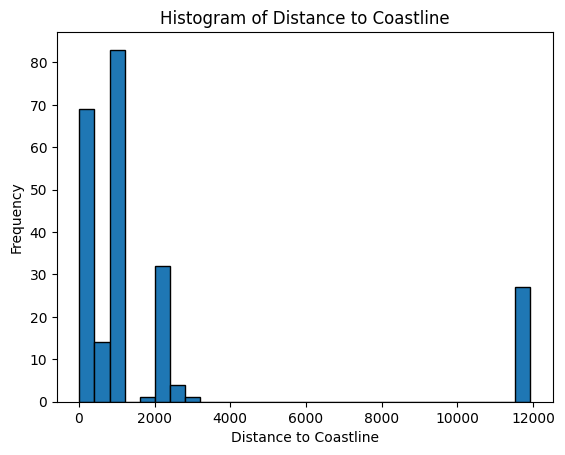

In [269]:
main_df['distance_to_coastline'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histogram of Distance to Coastline')
plt.xlabel('Distance to Coastline')
plt.ylabel('Frequency')
plt.show()

Based on the histogram, the data is not normally distributed, so the method we will use next to fill in the missing values is the median.

In [270]:
median = main_df['distance_to_coastline'].median()
main_df['distance_to_coastline'].fillna(median,inplace=True)

Next we can check is there any missing values in main dataset.

In [271]:
main_df.isna().sum()

property_id              0
property_name            0
property_type            0
property_design          0
area_id                  0
distance_to_coastline    0
dtype: int64

Next we will check missing values from areacodes dataset.

In [272]:
areacodes_df.isna().sum()

area_id                      0
area_name                    0
area_squad                   1
employee_id                 32
area_distance_to_airport    36
airport_pickup_price_idr    34
area_airport_name           34
region_id                   12
dtype: int64

First, we will drop the data that has missing values in the `area_squad` column.

In [273]:
areacodes_df = areacodes_df.dropna(subset=['area_squad'])

In [276]:
areacodes_df.isna().sum()

area_id                      0
area_name                    0
area_squad                   0
employee_id                 31
area_distance_to_airport    35
airport_pickup_price_idr    33
area_airport_name           33
region_id                   11
dtype: int64

next we will drop employee_id.

In [277]:
areacodes_df = areacodes_df.drop(columns=['employee_id'])

Fill missing values in 'area_airport_name' with the non-null values within the same 'region_id' group

In [281]:
areacodes_df['area_airport_name'] = areacodes_df.groupby('region_id')['area_airport_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
areacodes_df.isna().sum()

area_id                      0
area_name                    0
area_squad                   0
area_distance_to_airport    35
airport_pickup_price_idr    33
area_airport_name           11
region_id                   11
dtype: int64

We will region id with null values.

In [285]:
areacodes_df = areacodes_df.dropna(subset=['region_id'])
areacodes_df.isna().sum()

area_id                      0
area_name                    0
area_squad                   0
area_distance_to_airport    24
airport_pickup_price_idr    24
area_airport_name            0
region_id                    0
dtype: int64

Function to check normality and fill missing values accordingly.

In [290]:
def fill_missing_distance(group):
    data = group['area_distance_to_airport'].dropna()
    if len(data) > 1:
        ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        if ks_test.pvalue >= 0.05:
            fill_value = data.mean()
        else:
            fill_value = data.median()
        group['area_distance_to_airport'] = group['area_distance_to_airport'].fillna(fill_value)
    return group

area_df = areacodes_df.groupby('region_id').apply(fill_missing_distance)
area_df.isna().sum()

area_id                      0
area_name                    0
area_squad                   0
area_distance_to_airport    12
airport_pickup_price_idr    24
area_airport_name            0
region_id                    0
dtype: int64

Next we will handle remaining missing value in area distance to airport using global median.

In [291]:
global_median = area_df['area_distance_to_airport'].median()
area_df['area_distance_to_airport'] = area_df['area_distance_to_airport'].fillna(global_median)

Try to use correlation matrix on areacodes dataframe.

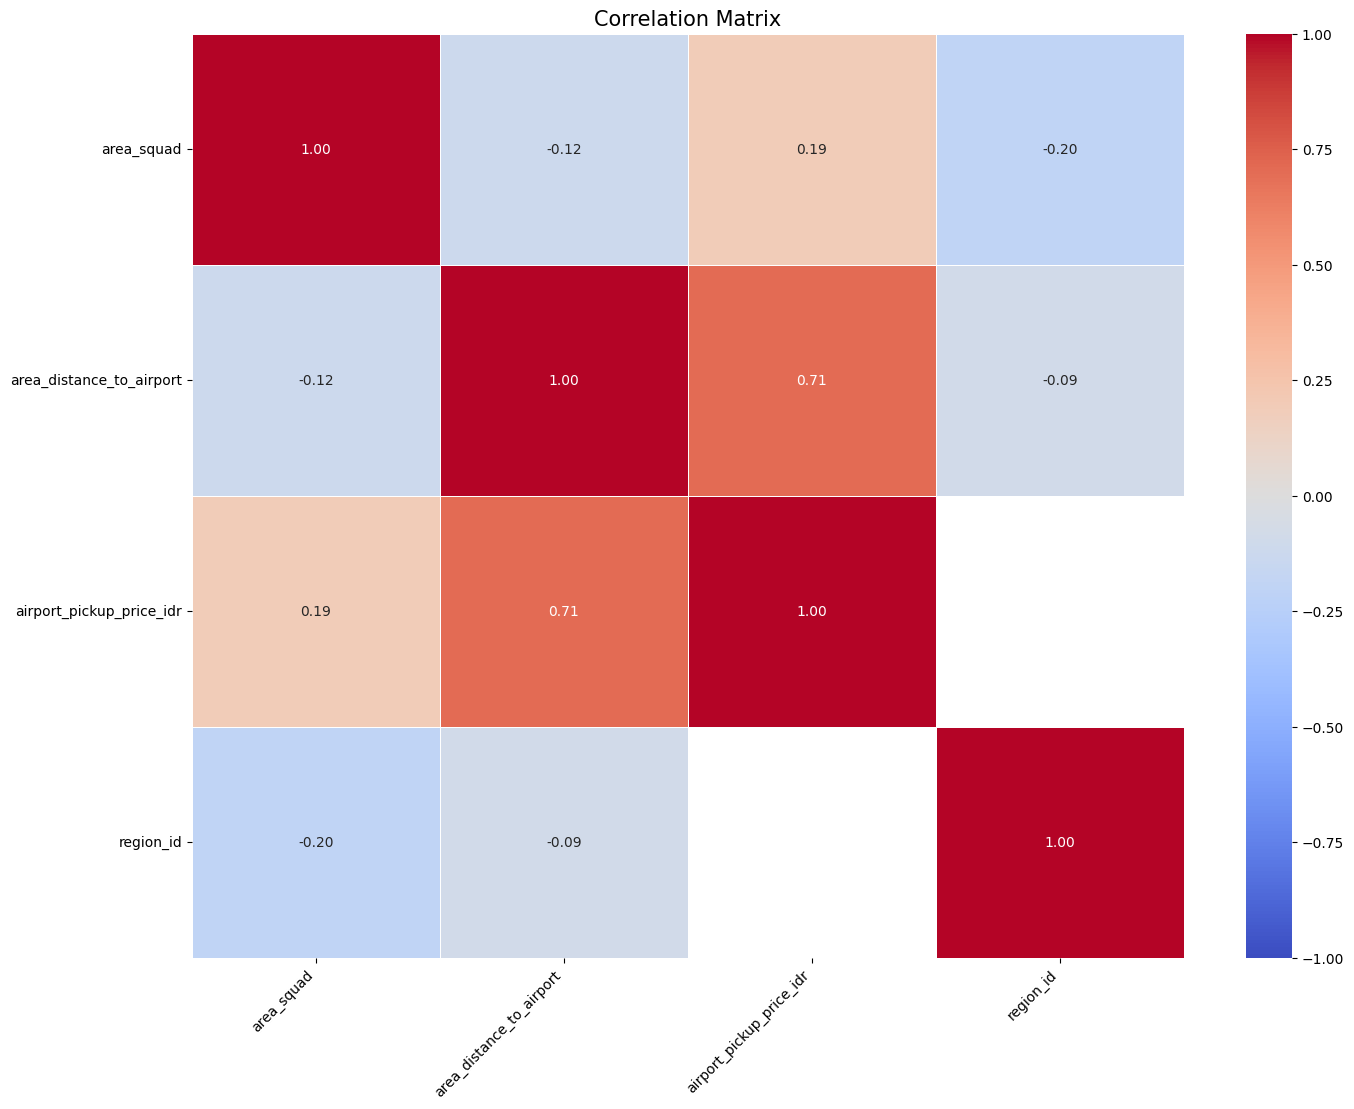

In [293]:
numeric_df = area_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"size": 10}
)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

 The heatmap shows that area_distance_to_airport has strong correlation with airport_pickup_price_idr.

In [294]:
def impute_missing(df, target_col, feature_cols):
        """
        Impute missing values in target_col using feature_cols with Linear Regression.
        """

        train_data = df[df[target_col].notnull()]
        X_train = train_data[feature_cols]
        y_train = train_data[target_col]

        predict_data = df[df[target_col].isnull()]
        X_predict = predict_data[feature_cols]

        model = LinearRegression()
        model.fit(X_train, y_train)

        df.loc[df[target_col].isnull(), target_col] = np.round(model.predict(X_predict))

        return df

In [296]:
if area_df['airport_pickup_price_idr'].isnull().any():
      impute_missing(area_df, 'airport_pickup_price_idr', ['area_distance_to_airport'])

In [298]:
area_df.isna().sum()

area_id                     0
area_name                   0
area_squad                  0
area_distance_to_airport    0
airport_pickup_price_idr    0
area_airport_name           0
region_id                   0
dtype: int64

After we handle all the missing values, the next step is we will combine main and areacodes dataset.

In [299]:
merged_dataset = pd.merge(main_df, area_df, on='area_id')

In [302]:
merged_dataset.head()

,property_id,property_name,property_type,property_design,area_id,distance_to_coastline,area_name,area_squad,area_distance_to_airport,airport_pickup_price_idr,area_airport_name,region_id
0,PR0017,Double D Guest House,4.0,0.0,A0003,1173.9868,Canggu,2.0,60.0,325000.0,Ngurah Rai (DPS),1.0
1,PR0070,Kubu Pande Homestay,4.0,2.0,A0003,1173.9868,Canggu,2.0,60.0,325000.0,Ngurah Rai (DPS),1.0
2,PR0126,Comeback Guesthouse,4.0,0.0,A0003,1173.9868,Canggu,2.0,60.0,325000.0,Ngurah Rai (DPS),1.0
3,PR0140,Lebak Guesthouse,4.0,0.0,A0003,1173.9868,Canggu,2.0,60.0,325000.0,Ngurah Rai (DPS),1.0
4,PR0160,Kakol Guesthouse,4.0,0.0,A0003,1173.9868,Canggu,2.0,60.0,325000.0,Ngurah Rai (DPS),1.0


Next, we will remove some features from merged_dataset.

In [303]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_id               333 non-null    object 
 1   property_name             333 non-null    object 
 2   property_type             333 non-null    float64
 3   property_design           333 non-null    float64
 4   area_id                   333 non-null    object 
 5   distance_to_coastline     333 non-null    float64
 6   area_name                 333 non-null    object 
 7   area_squad                333 non-null    float64
 8   area_distance_to_airport  333 non-null    float64
 9   airport_pickup_price_idr  333 non-null    float64
 10  area_airport_name         333 non-null    object 
 11  region_id                 333 non-null    float64
dtypes: float64(7), object(5)
memory usage: 31.3+ KB


Next we will drop features such as area_id and area_name.

In [304]:
property_df = merged_dataset.drop(columns=[ 'area_id', 'area_name'])

In [305]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_id               333 non-null    object 
 1   property_name             333 non-null    object 
 2   property_type             333 non-null    float64
 3   property_design           333 non-null    float64
 4   distance_to_coastline     333 non-null    float64
 5   area_squad                333 non-null    float64
 6   area_distance_to_airport  333 non-null    float64
 7   airport_pickup_price_idr  333 non-null    float64
 8   area_airport_name         333 non-null    object 
 9   region_id                 333 non-null    float64
dtypes: float64(7), object(3)
memory usage: 26.1+ KB


Next we can export property dataset to csv file.

In [306]:
property_df.to_csv('property_dataset.csv', index=False)